# Exercise: Titanic Dataset - Visualising Different Types of Data

To build better machine learning models, we should understand the available data. This usually involves:

1. Data visualization.

2. Understanding the kind of data we have available.

In this module, we'll practice cleaning our Titanic dataset. We'll also practice visualization of different kinds of data like the following:

- Continuous
- Ordinal
- Categorical
- Simple identity column

## First Inspection

Let's reload the Titanic Dataset, and reacquaint ourselves with its data:


In [1]:
import pandas as pd

# Load data from our dataset file into a pandas dataframe
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv"

# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv(url, index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Take a careful look at the columns, and try to identify those columns holding continuous, ordinal, categorical, or identity data.

We can display a brief summary of the _dataypes_ with the panda `info()` method:

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Several columns contain numerical data (the `int64` or `float64` types), while others contain more complex data types (those with `object` as Dtype)

## Visualising Ordinal Data

Let's visualize some ordinal data. We have available:

1. `Pclass`: The ticket class
2. `Parch`: The number of parents or children on the ship
3. `sibsp`: The number of siblings or spouses on the ship

We can view ordinal data with almost any kind of graph. We'll start with a simple histogram that describes relationships between the ticket class and the likelihood of survival.

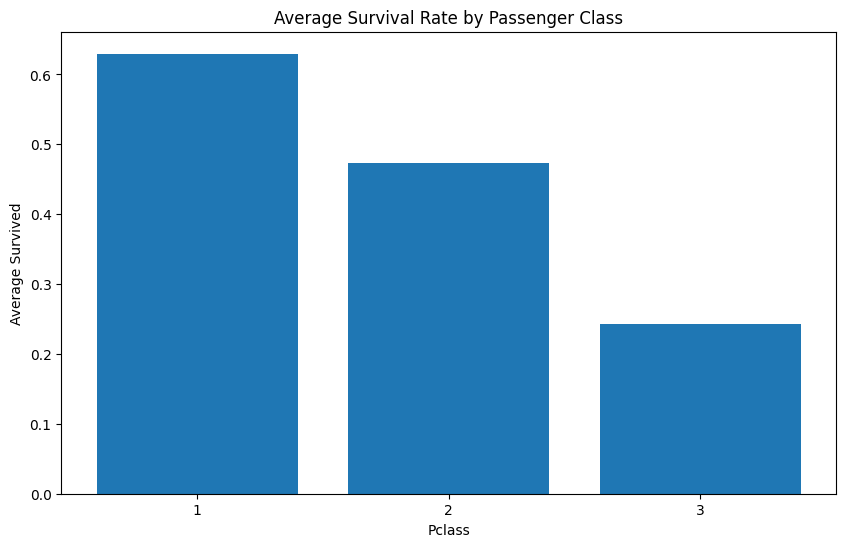

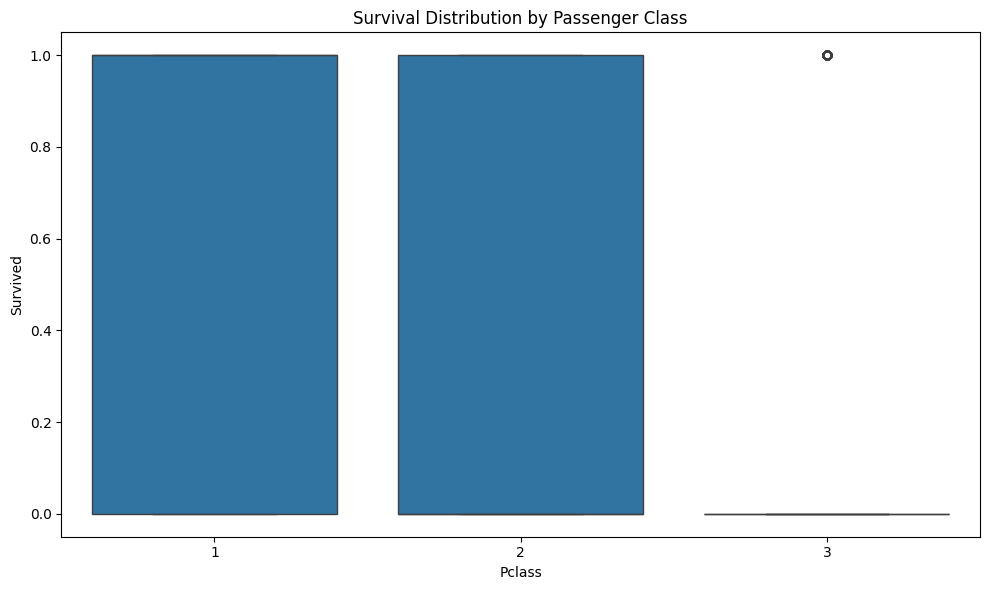

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns  # For better boxplots

# Group by 'Pclass' and compute average 'Survived'
avg_survived = dataset.groupby('Pclass')['Survived'].mean()

# Plot histogram (bar chart of averages)
plt.figure(figsize=(10, 6))
plt.bar(avg_survived.index.astype(str), avg_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Average Survived')
plt.title('Average Survival Rate by Passenger Class')

# Optionally add a boxplot
# We use seaborn's boxplot to display distribution of 'Survived' by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Survived', data=dataset)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Survival Distribution by Passenger Class')

plt.tight_layout()
plt.show()

The top plot shows that at least half the people had third-class tickets. Note how the median and maximum of the plot both sit at `Pclass = 3`.

The histogram shows that people in second and third class tended not to survive the wreck.

Let's look at how survival varies, depending on whether a passenger had parents or children on the ship.

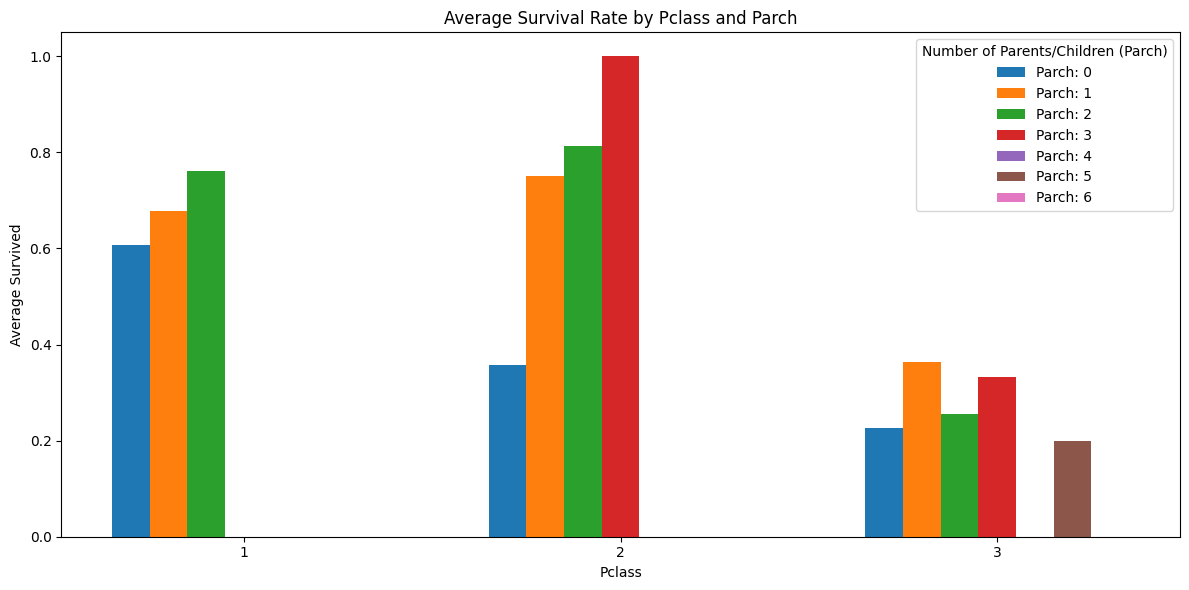

In [4]:
import numpy as np

# Group by Pclass and Parch, and compute the average of Survived
grouped = dataset.groupby(['Pclass', 'Parch'])['Survived'].mean().unstack(fill_value=0)

# Create bar plot
x = np.arange(len(grouped.index))  # the label locations
width = 0.1  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each Parch value to create grouped bars
for i, parch in enumerate(grouped.columns):
    ax.bar(x + i * width, grouped[parch], width, label=f'Parch: {parch}')

# Labeling
ax.set_xlabel('Pclass')
ax.set_ylabel('Average Survived')
ax.set_title('Average Survival Rate by Pclass and Parch')
ax.set_xticks(x + width * (len(grouped.columns) - 1) / 2)
ax.set_xticklabels(grouped.index.astype(str))
ax.legend(title='Number of Parents/Children (Parch)')

plt.tight_layout()
plt.show()

For first and second class ticket holders, people in larger family groups appear to have had better rates of survival. However, this doesn't seem to be the case for third class passengers.

Finally, let's see if those with different ticket types tended to be in differently-sized families. For data spread analysis, a box and whisker is a nice alternative to histograms.


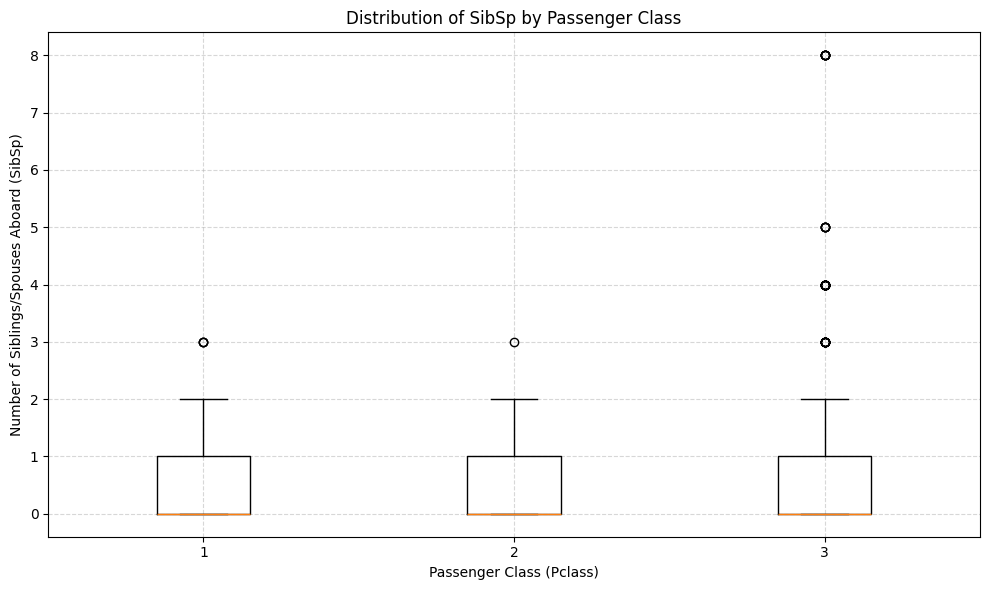

In [7]:
import matplotlib.pyplot as plt

# Group 'SibSp' values by 'Pclass', dropping NaNs
grouped = [
    group["SibSp"].dropna().values
    for _, group in dataset.groupby("Pclass", sort=True)
]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped, tick_labels=sorted(dataset["Pclass"].dropna().unique()))
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Number of Siblings/Spouses Aboard (SibSp)")
plt.title("Distribution of SibSp by Passenger Class")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Most values are zero. This shows that most people traveled without siblings and without a partner. There are no obvious differences in this value between the different ticket classes.

## Visualising Continuous Data

_Continuous_ data are usually best viewed using either:

1. An XY scatter plot, especially for relationships between two continuous features.
2. Histograms or Box and Whisker plots to look at the spread of data.

Our dataset has `Age` and `Fare` as continuous data columns. Let's view them:

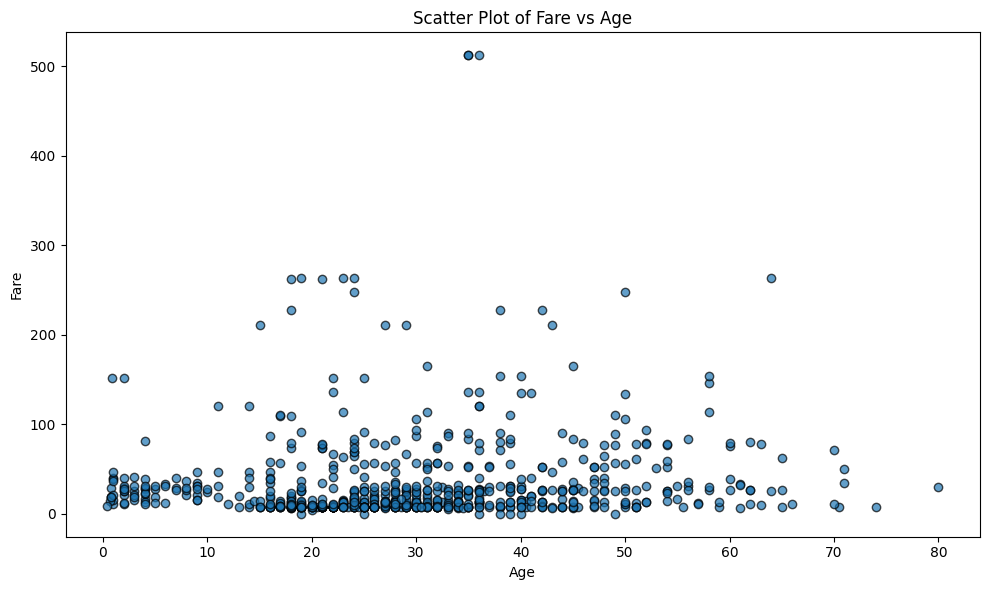

In [8]:
# Remove rows with missing values in Age or Fare
filtered_data = dataset.dropna(subset=['Age', 'Fare'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Age'], filtered_data['Fare'], alpha=0.7, edgecolors='k')

# Labeling
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare vs Age')

plt.tight_layout()
plt.show()

We don't see an obvious relationship between `Age` and `Fare`. 

Does the cost of a fare, or the person's age, have any relationship with likelihood of survival?

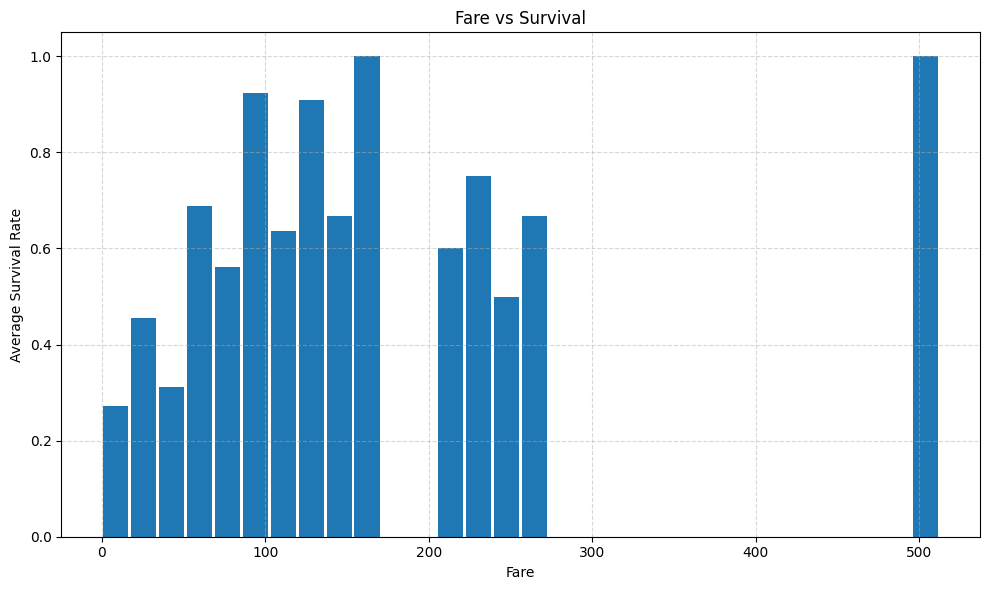

<Figure size 1000x600 with 0 Axes>

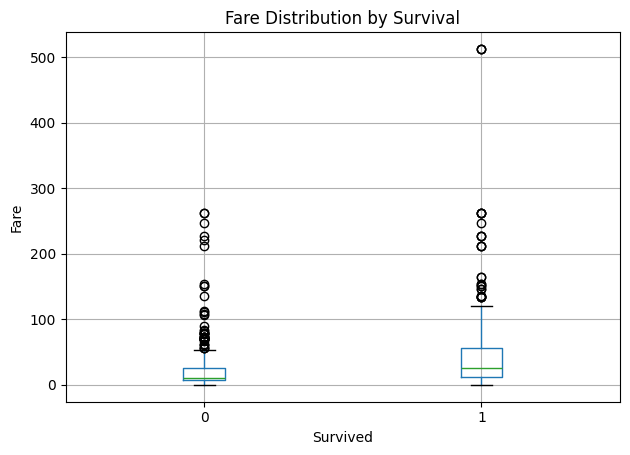

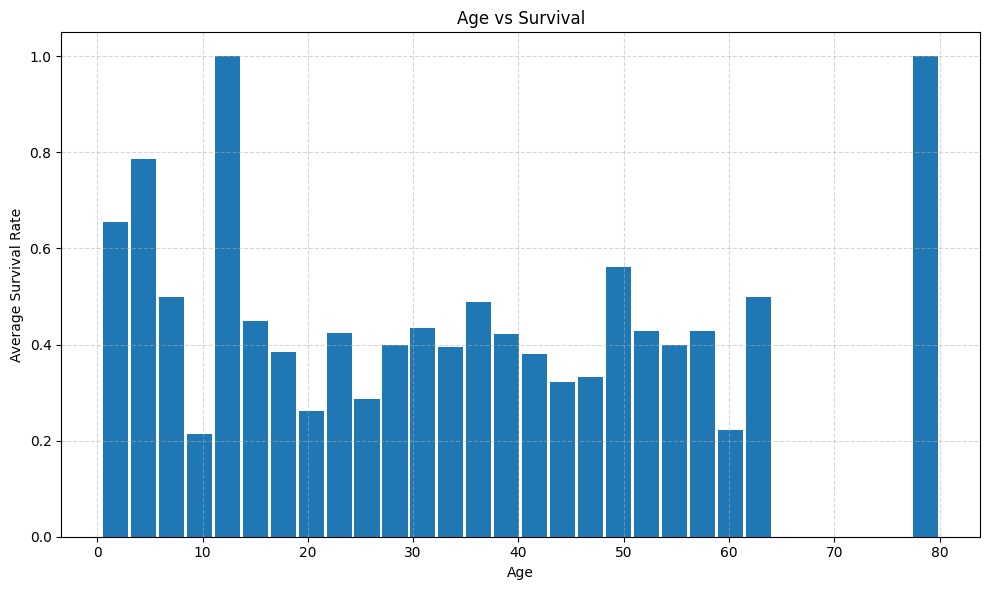

<Figure size 1000x600 with 0 Axes>

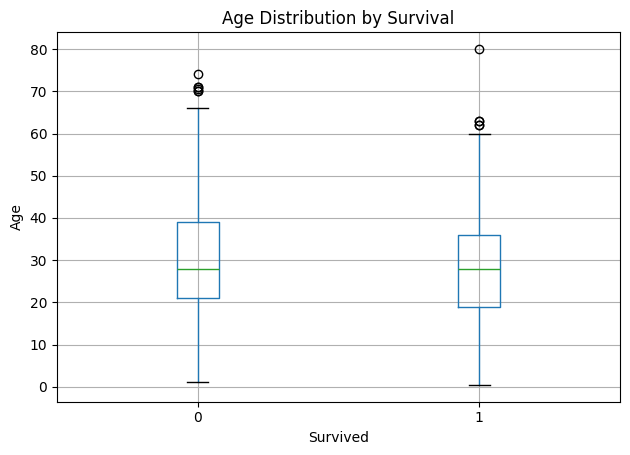

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Fare Analysis ---
fare_data = dataset.dropna(subset=['Fare', 'Survived']).copy()

fare_bins = np.linspace(fare_data['Fare'].min(), fare_data['Fare'].max(), 31)
fare_data['Fare_bin'] = pd.cut(fare_data['Fare'], fare_bins)

avg_survival_by_fare = fare_data.groupby('Fare_bin', observed=True)['Survived'].mean()

fare_midpoints = [interval.mid for interval in avg_survival_by_fare.index]

plt.figure(figsize=(10, 6))
plt.bar(fare_midpoints, avg_survival_by_fare, width=(fare_bins[1] - fare_bins[0]) * 0.9)
plt.xlabel('Fare')
plt.ylabel('Average Survival Rate')
plt.title('Fare vs Survival')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot of Fare by Survival
plt.figure(figsize=(10, 6))
dataset.dropna(subset=['Fare', 'Survived'])[['Fare', 'Survived']].boxplot(by='Survived')
plt.title('Fare Distribution by Survival')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

# --- Age Analysis ---
age_data = dataset.dropna(subset=['Age', 'Survived']).copy()

age_bins = np.linspace(age_data['Age'].min(), age_data['Age'].max(), 31)
age_data['Age_bin'] = pd.cut(age_data['Age'], age_bins)

avg_survival_by_age = age_data.groupby('Age_bin', observed=True)['Survived'].mean()
age_midpoints = [interval.mid for interval in avg_survival_by_age.index]

plt.figure(figsize=(10, 6))
plt.bar(age_midpoints, avg_survival_by_age, width=(age_bins[1] - age_bins[0]) * 0.9)
plt.xlabel('Age')
plt.ylabel('Average Survival Rate')
plt.title('Age vs Survival')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot of Age by Survival
plt.figure(figsize=(10, 6))
dataset.dropna(subset=['Age', 'Survived'])[['Age', 'Survived']].boxplot(by='Survived')
plt.title('Age Distribution by Survival')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


The boxplot (top) of the first figure shows that most people held tickets that cost less than £25, and the histogram shows that people with more expensive tickets tended to survive.

The second figure indicates passengers were about 30 years old on average, and that most children under 10 years old survived, unlike most adults.


## Visualising Categorical Data

The Titanic dataset has these _categorical_ columns:
* `Sex`: Male, Female
* `Embarked`: The port of ambarkation (C, Q, or S)
* `Cabin`: Many options
* `Survival`: 0 = no, 1 = yes

Categorical data are usually viewable in a similar way to ordinal data, but with data viewed as order-less groups. Alternatively, categories appear as colors or groups in other kinds of plots.

Plotting categorical data against other categorical data shows how data is clustered. This is little more than a colored table. Let's do this now:

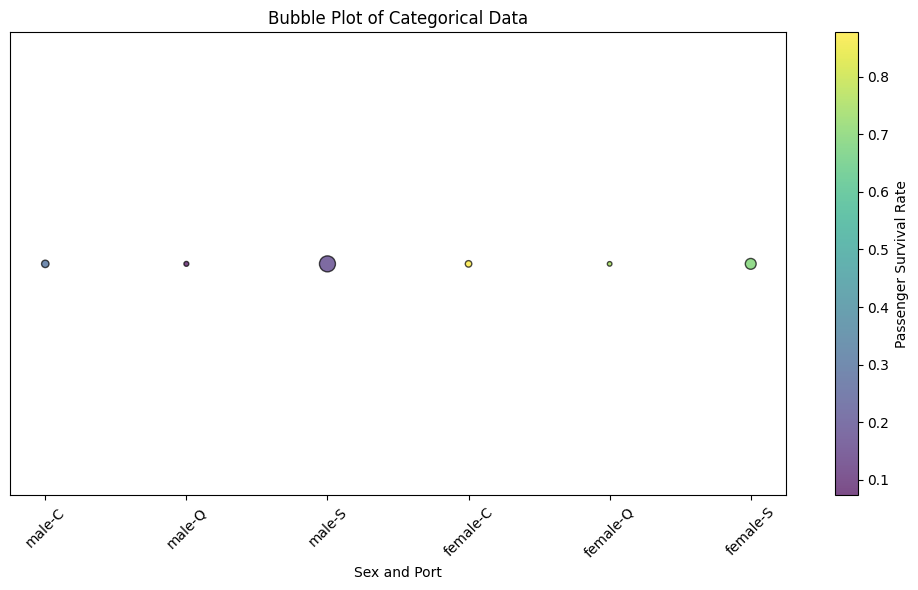

In [9]:
import numpy as np

# Create some simple functions
# Read their descriptions to find out more 
def get_rows(sex, port):
    '''Returns rows that match in terms of sex and embarkment port'''
    return dataset[(dataset.Embarked == port) & (dataset.Sex == sex)]

def proportion_survived(sex, port):
    '''Returns the proportion of people meeting criteria who survived'''
    survived = get_rows(sex, port).Survived
    return np.mean(survived)

# Make two columns of data - together these represent each combination
# of sex and embarkment port
sexes = ["male", "male", "male", "female","female", "female"]
ports = ["C", "Q", "S" ] * 2

# Calculate the number of passengers at each port + sex combination
passenger_count = [len(get_rows(sex, port)) for sex,port in zip(sexes, ports)]

# Calculate the proportion of passengers from each port + sex combination who survived
passenger_survival = [proportion_survived(sex, port) for sex,port in zip(sexes, ports)]

# Combine into a single data frame
table = pd.DataFrame(dict(
    sex=sexes,
    port=ports,
    passenger_count=passenger_count,
    passenger_survival_rate=passenger_survival
))

# Make a bubble plot
# This is just a scatter plot but each entry in the plot 
# has a size and color. We set color to passenger_survival 
# and size to the number of passengers 

# Define x-axis labels as combined categories (e.g., "male-C")
table['category'] = table['sex'] + '-' + table['port']

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the scatter plot (bubble plot)
scatter = plt.scatter(
    x=table['category'],
    y=[1] * len(table),  # Place all bubbles on same y level (optional)
    s=table['passenger_count'] * 0.3,  # Size scaled
    c=table['passenger_survival_rate'],  # Color by survival rate
    cmap='viridis',  # Color map
    alpha=0.7,
    edgecolors='k'
)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Passenger Survival Rate')

# Formatting
plt.title('Bubble Plot of Categorical Data')
plt.xlabel('Sex and Port')
plt.yticks([])  # Hide y-axis ticks since it's not meaningful
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

It appears that women have a much higher survival rate than men, but there were more men on the ship. 

We can also see that most people boarded at Port `S` ("Southampton"). It does seem that there is a weak relationship between the port of boarding and survival.

## Summary

You learned about different types of data, and you practiced data exploration through graphs.

Through these, we've discovered that some features are related to others, and that many features seem to influence the survival rate.